# chord_length_distribution

In [1]:
import porespy as ps
from IPython.display import Markdown as show
show(ps.tools.show_docstring(ps.metrics.chord_length_distribution))

---
 ## Documentation for ``chord_length_distribution``
 ---
**<span style="color:purple">chord&#95;length&#95;distribution</span>_(im, bins=None, log=False, voxel_size=1, normalization='count')_**


Determines the distribution of chord lengths in an image containing chords.


#### Parameters
* im : <b><i>ND-image</i></b>  An image with chords drawn in the pore space, as produced by
	``apply_chords`` or ``apply_chords_3d``.
	
	``im`` can be either boolean, in which case each chord will be
	identified using ``scipy.ndimage.label``, or numerical values in which
	case it is assumed that chords have already been identifed and labeled.
	In both cases, the size of each chord will be computed as the number
	of voxels belonging to each labelled region.
* bins : <b><i>scalar or array_like</i></b>  If a scalar is given it is interpreted as the number of bins to use,
	and if an array is given they are used as the bins directly.
* log : <b><i>boolean</i></b>  If ``True`` (default) the size data is converted to log (base-10)
	values before processing.  This can help to plot wide size
	distributions or to better visualize the in the small size region.
	Note that you should not anti-log the radii values in the retunred
	``tuple``, since the binning is performed on the logged radii values.
* normalization : <b><i>string</i></b>  Indicates how to normalize the bin heights.  Options are:
	
	*'count' or 'number'* - (default) This simply counts the number of
	chords in each bin in the normal sense of a histogram.  This is the
	rigorous definition according to Torquato [1].
	
	*'length'* - This multiplies the number of chords in each bin by the
	chord length (i.e. bin size).  The normalization scheme accounts for
	the fact that long chords are less frequent than shorert chords,
	thus giving a more balanced distribution.
* voxel_size : <b><i>scalar</i></b>  The size of a voxel side in preferred units.  The default is 1, so the
	user can apply the scaling to the returned results after the fact.

#### Returns
* result : <b><i>named_tuple</i></b>  A tuple containing the following elements, which can be retrieved by
	attribute name:
	
	*L* or *LogL* - chord length, equivalent to ``bin_centers``
	
	*pdf* - probability density function
	
	*cdf* - cumulative density function
	
	*relfreq* - relative frequency chords in each bin.  The sum of all bin
	heights is 1.0.  For the cumulative relativce, use *cdf* which is
	already normalized to 1.
	
	*bin_centers* - the center point of each bin
	
	*bin_edges* - locations of bin divisions, including 1 more value than
	the number of bins
	
	*bin_widths* - useful for passing to the ``width`` argument of
	``matplotlib.pyplot.bar``

#### References
[1] Torquato, S. Random Heterogeneous Materials: Mircostructure and
Macroscopic Properties. Springer, New York (2002) - See page 45 & 292
---

### Import packages

In [2]:
import porespy as ps
import matplotlib.pyplot as plt

ps.visualization.set_mpl_style()

### Create image and variables:

Variables created are bins, log, voxel_size, and normalization.
The image is created using the blobs generator function, then the prune_branches filter is applied. The image plotted is below:

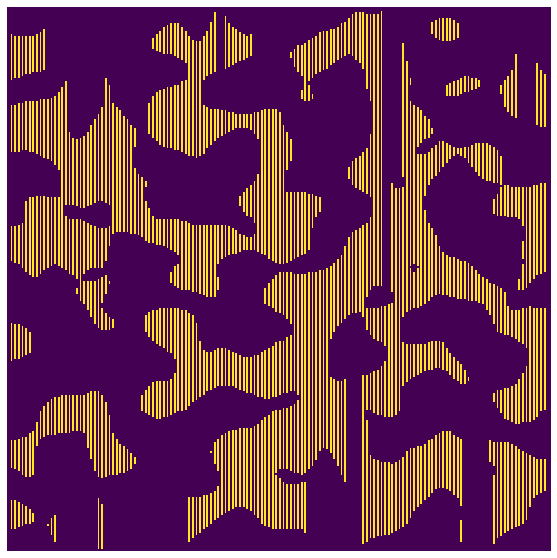

In [3]:
im = ps.generators.blobs(shape=[300, 300])
im = ps.filters.apply_chords(im, spacing=1, axis=0, trim_edges=True, label=False)

plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

#default values:
bins = None
log = False
voxel_size = 1
normalization = "count"

### Apply metric function:

Output is a tuple with elements L, pdf, cdf, relfreq, bin_centers, bin_edges, and bin_widths.

### default

In [4]:
x = ps.metrics.chord_length_distribution(im=im, bins= bins, log=log, voxel_size=voxel_size, normalization=normalization)

Plot results:

Text(0.5, 1.0, 'Bar Plot')

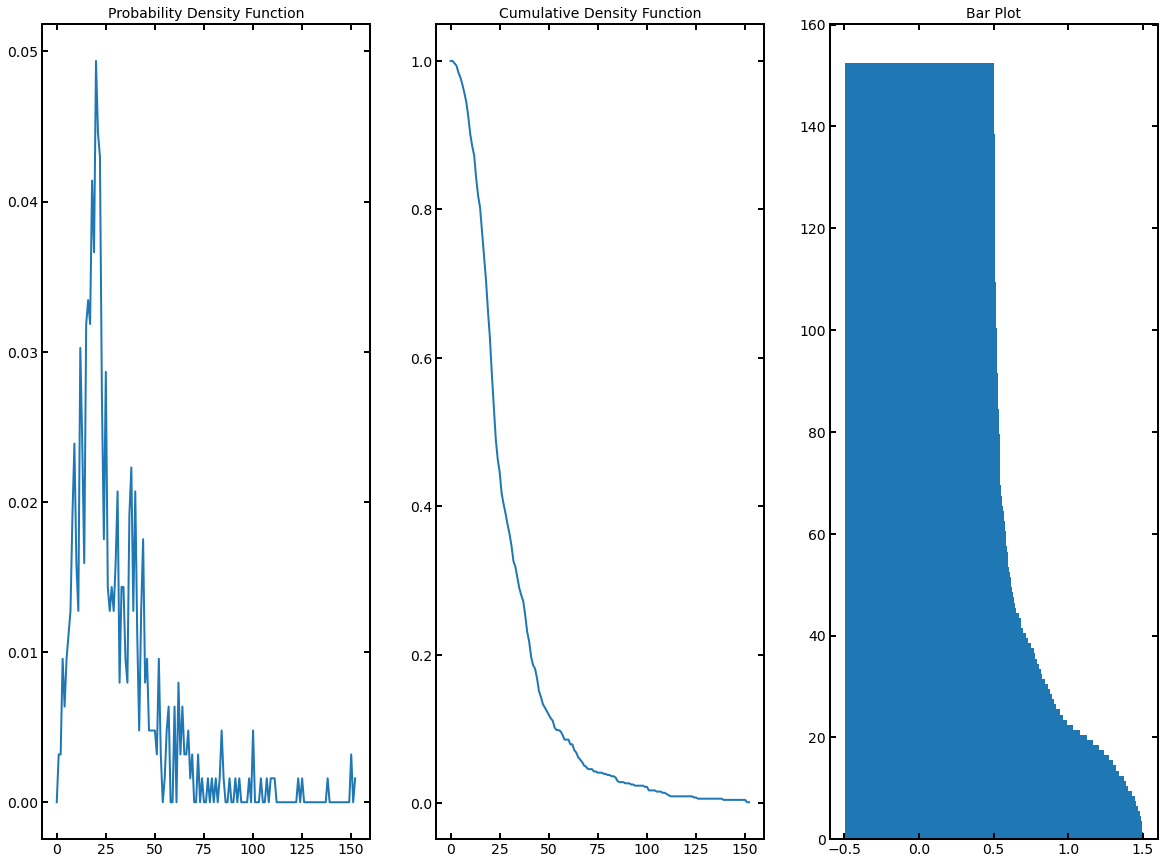

In [5]:

fig, ax = plt.subplots(1, 3, figsize=[20, 15]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[2].bar(x.cdf, x.L, x.bin_widths)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot')



### bins

In [6]:
x = ps.metrics.chord_length_distribution(im=im, bins= 5, log=log, voxel_size=voxel_size, normalization=normalization)

Plot results:

Text(0.5, 1.0, 'Bar Plot')

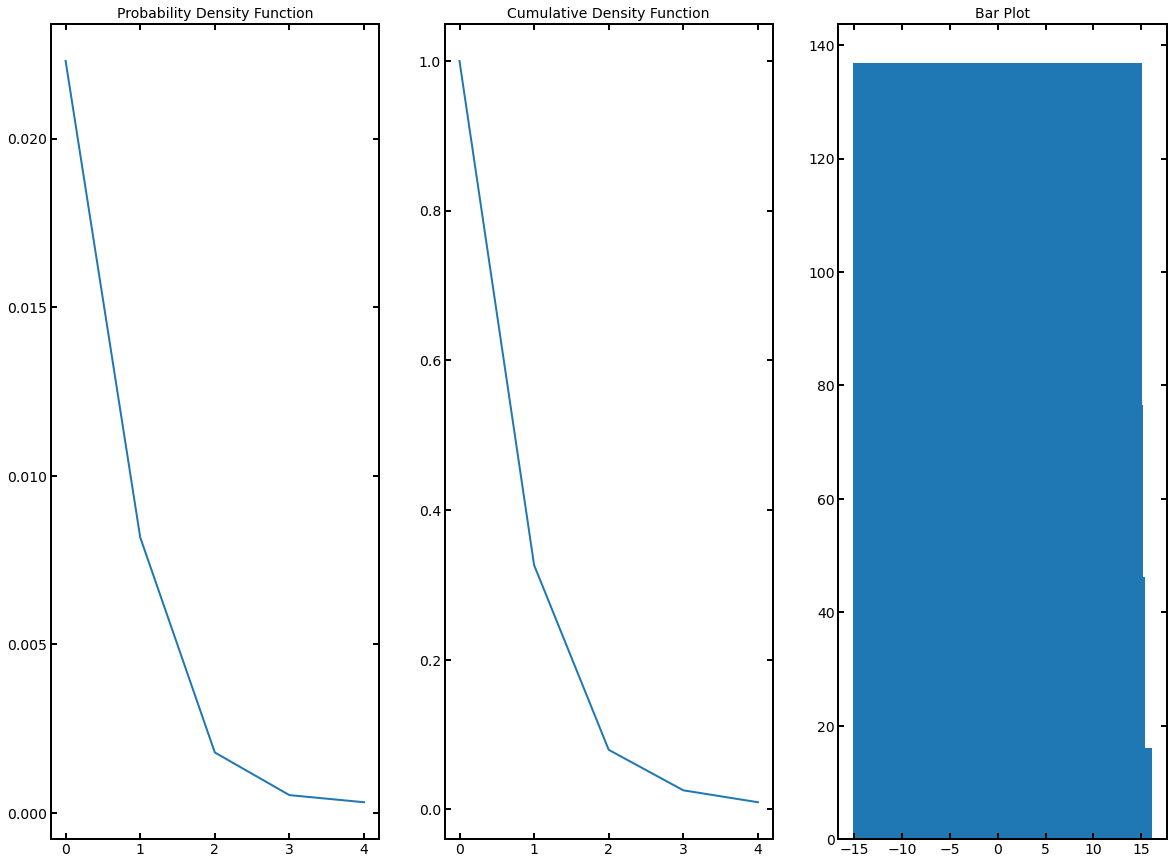

In [7]:

fig, ax = plt.subplots(1, 3, figsize=[20, 15]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[2].bar(x.cdf, x.L, x.bin_widths)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot')



### log

In [8]:
x = ps.metrics.chord_length_distribution(im=im, bins= bins, log=True, voxel_size=voxel_size, normalization=normalization)

Plot results:

Text(0.5, 1.0, 'Bar Plot')

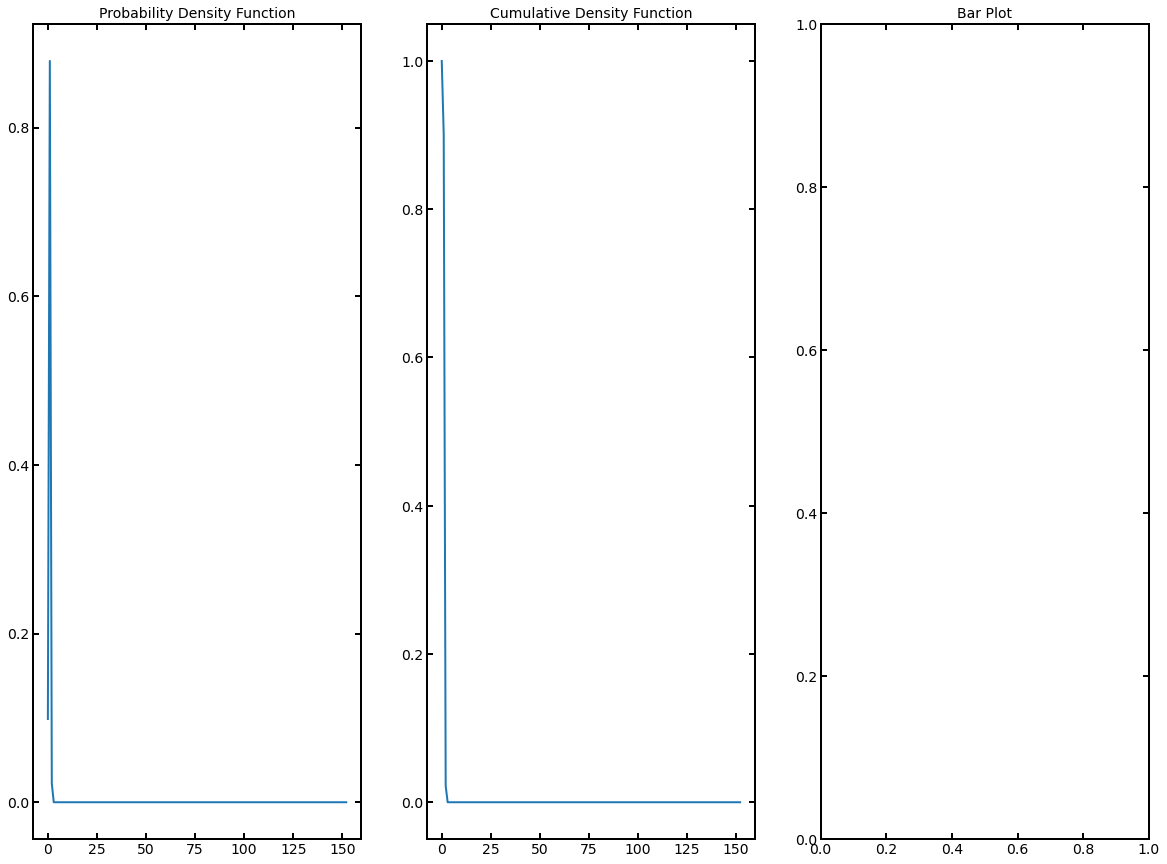

In [9]:

fig, ax = plt.subplots(1, 3, figsize=[20, 15]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
#ax[2].bar(x.cdf, x.L, x.bin_widths)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot')



### voxel_size

In [10]:
x = ps.metrics.chord_length_distribution(im=im, bins= bins, log=log, voxel_size=5, normalization=normalization)

Plot results:

Text(0.5, 1.0, 'Bar Plot')

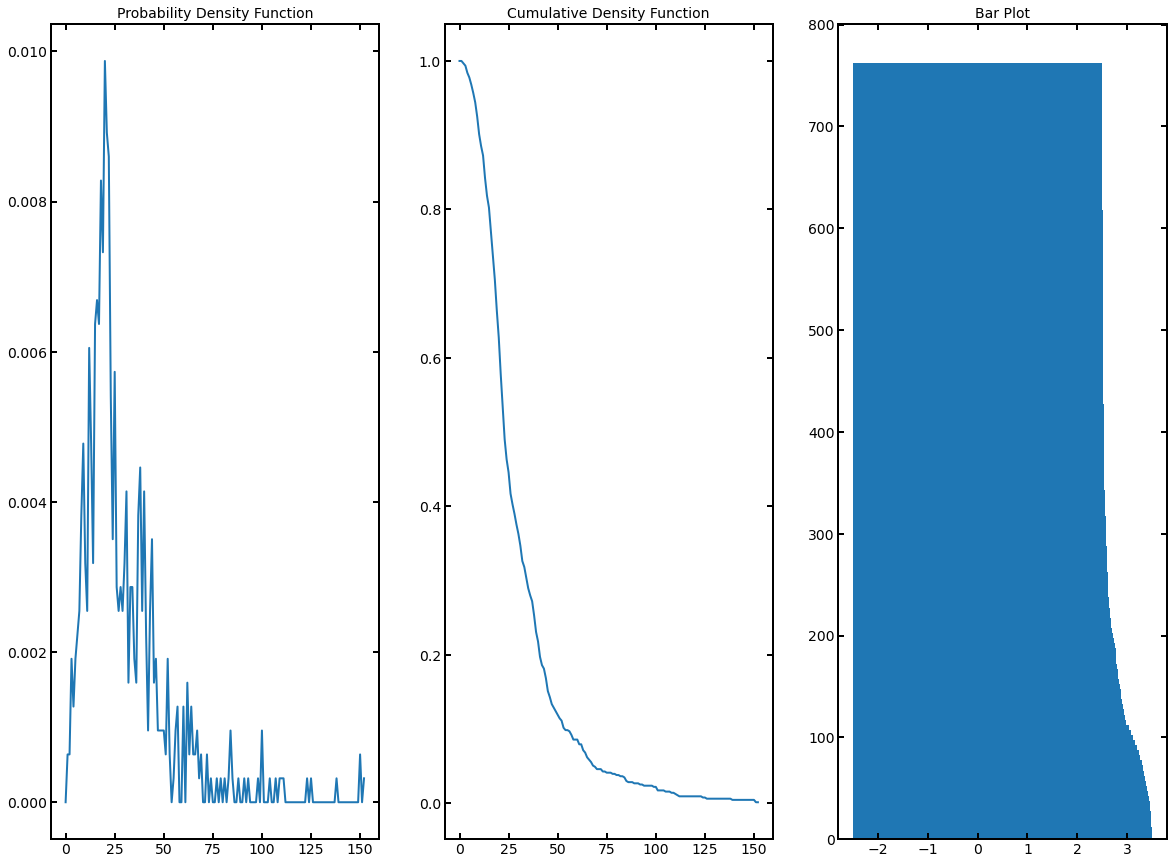

In [11]:

fig, ax = plt.subplots(1, 3, figsize=[20, 15]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[2].bar(x.cdf, x.L, x.bin_widths)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot')



### normalization
options are count or length

In [12]:
x = ps.metrics.chord_length_distribution(im=im, bins= bins, log=log, voxel_size=voxel_size, normalization='length')

Plot results:

Text(0.5, 1.0, 'Bar Plot')

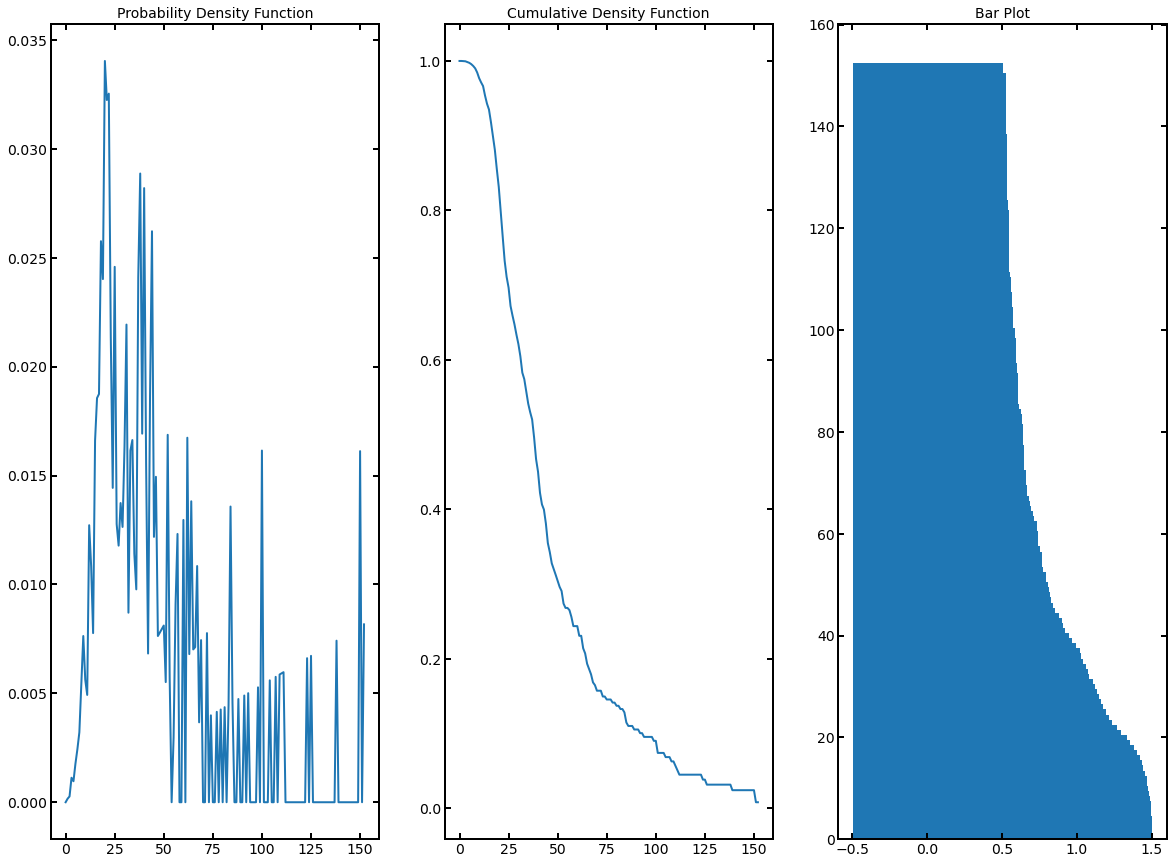

In [13]:

fig, ax = plt.subplots(1, 3, figsize=[20, 15]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[2].bar(x.cdf, x.L, x.bin_widths)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot')

